# Capstone Project - The Battle of Neighborhoods

This file, and other associated files, make up my contribution to the final Peer Reviewed Assignment for the Coursera Capstone Project for Applied Data Science Capstone. This was my final module in the IBM Data Science Professional Certificate programme.

For reference I include the original definition for each part of the assignment.

### Part 1 [Week 1]

Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

This submission will eventually become your Introduction / Business Problem section in your final report. So I recommend that you push the report (having your Introduction/Business Problem section only for now) to your Github repository and submit a link to it.

### Part 2 [Week 1]

Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

This submission will eventually become your Data section in your final report. So I recommend that you push the report (having your Data section) to your Github repository and submit a link to it.

### Part 3 [Week 2]

In this week, you will continue working on your capstone project. Please remember by the end of this week, you will need to submit the following:

A full report consisting of all of the following components (15 marks):
Introduction where you discuss the business problem and who would be interested in this project.
Data where you describe the data that will be used to solve the problem and the source of the data.
Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.
Results section where you discuss the results.
Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
Conclusion section where you conclude the report.
A link to your Notebook on your Github repository pushed showing your code. (15 marks).
Your choice of a presentation or blogpost. (10 marks)

### Section 1: Introduction

In this section I will clearly define the idea of my choosing, where I leverage the Foursquare location data to solve the imagined business opportunity.

### Background

There are 100's, maybe even 1000's, of travel sites on the Internet, including FourSquare, that will tell you all about places to go, things to see, restaurants to eat at, bars to drink in, nightclubs to part the night away in and then where to go in the morning to get breakfast and a strong coffee. The problems with these sites is that they are one dimensional. If you want to find out all this information about a city you plan to visit next month, you have to do the hard work. Also, just because a venue is the hottest place to go for a night out does not always mean that the unwitting tourist should just ramble in unprepared. The areas surrounding this new venue might be riddled with crime including muggings, car theft and assault, for example. Approach the venue from any direction other than from the north and you could be putting your life in danger. This is when my idea comes in.

Imagine the following scenario:

- You like to plan ahead and always review your options and make your choices about where you will visit and eat up front before you travel.
- You are flying to Chicogo for a Data Science Conference.
- You arrive in Chicago the day the conference starts but you've managed to convince your boss to delay your return by a few days giving you time to explore.
- But you know no one in Chicago to show you around to all the top sites and to bring you to the best restaurants.
- Also the last time you went to a conference you were mugged and had you passport. money and credit cards stolen so you're now nervous of going somewhere without first researching the venue and the surrounding area.
- The conference is next week and you don't have time to do all the research you'd like.

What do you do ... ?

## Project

### Indroduction

#### Description & Disscusing of the Background

My Capstone Project will be using the city of New York to show that when driven by venue and location data from FourSquare, it is possible to present potentail house renters and buying with a list of attractive areas to rent or buy from. Using graphics to show locations availability of attractive social amenities like school, resturants e.t.c.

New York City's demographic show that it is a large and ethnically diverse metropolis, It is the larges city in the United States and the 10th largest city in the world by population. New York city has a long history of international immigration with neary 8.5 million people in 2014, accounting for over 40% of the population of New York State. Over the last decade the city has been growing faster than the region and one of the many reason for this is that New York City has been a major point of entry for immigration: the team "melting pot" was coined to describe densely pupolated immigration neighborhoods on the Lower East Side.

With the influx of immigrants, comes the increase in the need to rent or buy property in the City. 

This project will focus on listing and visualizing all major part of New York City that has some essential socail amenities like school, hospital taken into consideration by families when moving into a new Neighborhoods

### Data Description

In order to acheive the this project, we will be using the below data source

- New York City data that contains list Boroughs, Neighborhoods along with their latitude and longitude. Data source : https://cocl.us/new_york_dataset Description : This data set contains the required information. And we will use this data set to explore various neighborhoods of new york city. 
- Social amenities in each neighborhood of new york city. Data source : Fousquare API Description : By using this api we will get all the venues in each neighborhood. 
- We can filter these venues to get the type and number of social amenities like schools and hospital in each Boroughs. 
- GeoSpace data Data source : https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm Description : By using this geo space data we will get the New york Borough boundaries that will help us visualize choropleth map.

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

### Approach

- Use an open source New York City dataset from https://cocl.us/new_york_dataset 
- User FourSqure API to explore the boroughs and segment them.
- Using FourSquare api to query venue for each neighborhood.
- Filter out FourSquare api result by social amenities like Hospital and school
- Rate each neighborhood based of the number of amenities
- Use python folium library to visualize geographic details of each neighborhood based on it's rating

### Analysis

#### Required Libraries

- pandas and numpy for handling data.
- request module for using FourSquare API.
- geopy to get co-ordinates of City of New York.
- Python folium to visualize the results on a map

In [3]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# !conda install -c conda-forge folium=0.5.0 --yes
# pip install folium=0.5.0

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import lxml

# import k-means from clustering stage
from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.datasets.samples_generator import make_blobs
from bs4 import BeautifulSoup
# !conda install -c conda-forge geopy --yes

print('Libraries imported.')

Libraries imported.


#### Get geocode location of address

In [4]:
def geo_location(address):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

#### Interact with FourSqure API

In [5]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'PG2FNOSIELJIMK1XBT3CM4XANGBPZLJRXFBVB45DQSWOBJIP' # changed my Foursquare ID
    CLIENT_SECRET = 'WXOBKAKTBO4DYMZ1RF0V5W4TD5R5RFPROADL2RKDGRWHQ3X0' # changed Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df

In [6]:

def get_venue_details(venue_id):
        
    CLIENT_ID = 'PG2FNOSIELJIMK1XBT3CM4XANGBPZLJRXFBVB45DQSWOBJIP' # i have changed the id with ##
    CLIENT_SECRET = 'WXOBKAKTBO4DYMZ1RF0V5W4TD5R5RFPROADL2RKDGRWHQ3X0' # i have changed the secret with ##
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Now we define a funtion to get the new york city data such as Boroughs, Neighborhoods along with their latitude and longitude.

In [7]:
import requests # library to handle requests
import pandas as pd # library for data analsysis

def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

Get new york data

In [8]:
new_york_data=get_new_york_data()
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
new_york_data.shape

(306, 4)

So there are total of 306 different Neighborhoods in New York

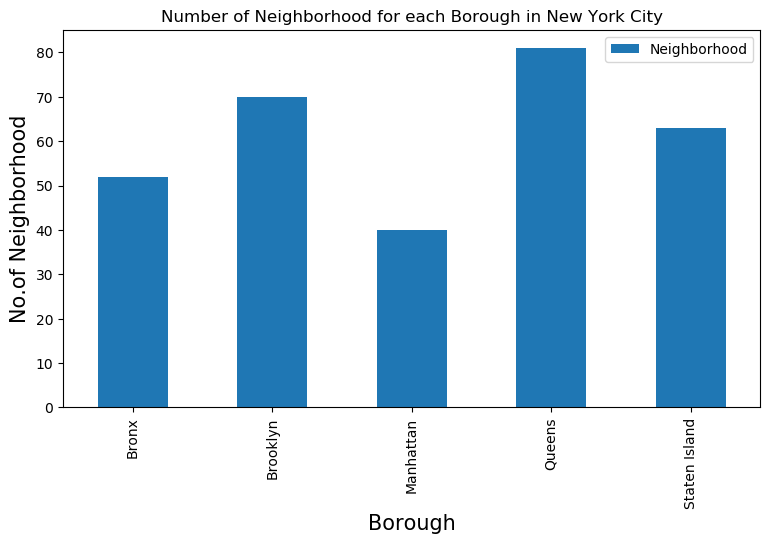

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Get the number of high school for each Neighborhood

In [29]:
# prepare neighborhood list filtered by high schools & Universities
column_names=['Borough', 'Neighborhood', 'ID','Name']
schools_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    schools=venues[venues['Category']=='Resturant']   
    print('(',count,'/',len(new_york_data),')','Schools in '+Neighborhood+', '+Borough+':'+str(len(schools)))
    for school_detail in schools.values.tolist():
        id, name , category=school_detail
        schools_ny = schools_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5e73427183525f001bce2fac'}, 'response': {}}


KeyError: 'groups'

In [27]:
schools_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Melrose,4cb9b1dedd41a35dfd2ae3a0,DreamYard Art Center
1,Bronx,Port Morris,4f39467ae4b039c3c45d8406,Mott Haven Charter School
2,Bronx,Morrisania,4cb9b1dedd41a35dfd2ae3a0,DreamYard Art Center
3,Brooklyn,Brownsville,4cab3fc476d3a09333712a6b,PS 156 Waverly School of the Arts
4,Brooklyn,Gerritsen Beach,4d36fd214f36a1433e313f27,P.S. 277 - The Gerritsen Beach School


In [28]:
schools_ny.shape

(5, 4)

6 schools in NY

TypeError: Empty 'DataFrame': no numeric data to plot

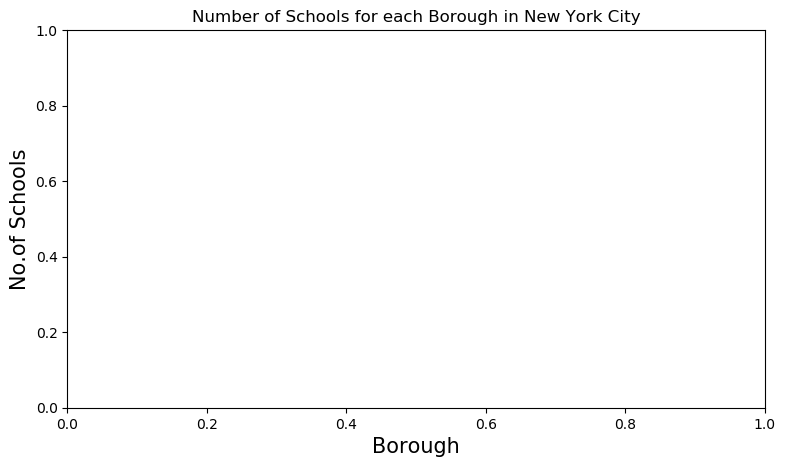

In [30]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Schools for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Schools', fontsize=15)
#giving a bar plot
schools_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

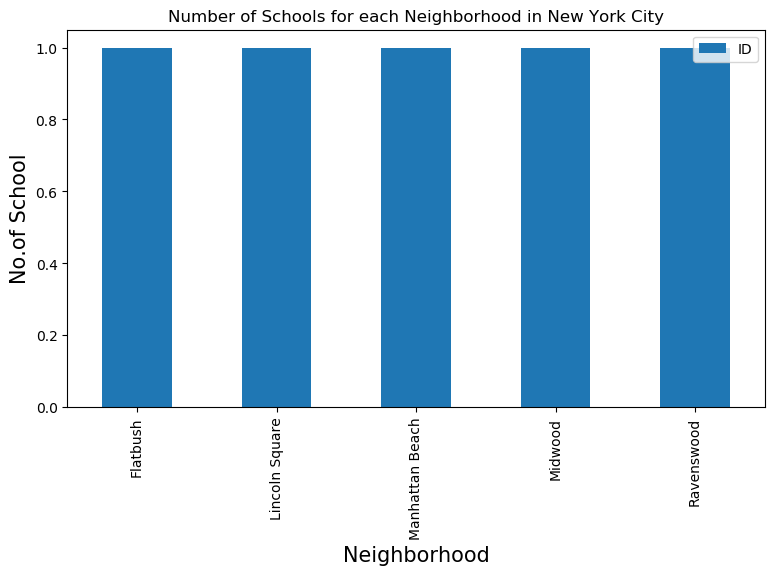

In [19]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Schools for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of School', fontsize=15)
#giving a bar plot
schools_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [31]:
schools_ny[schools_ny['Neighborhood']=='Flatbush']

,Borough,Neighborhood,ID,Name
